# Exploratory Data Analysis (EDA) – Heart Disease Dataset  
**Author:** Jyoti Prakash Das  
**Project:** Analyse Health and Demographic Data for Heart Disease  
**Component:** Exploratory Data Analysis  
**Date:** 13-01-2026

This notebook performs univariate and bivariate analysis on the BRFSS 2015 heart disease dataset to identify key risk factors associated with heart disease.


In [191]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_theme(style="whitegrid")

# Loading Dataset
df = pd.read_csv("heart_disease_health_indicators_BRFSS2015 2.csv")
df.head()


,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


### Dataset Overview  
This dataset contains health and demographic indicators collected through the BRFSS 2015 survey.  
Key variables include age, BMI, blood pressure, cholesterol, lifestyle factors, and heart disease status.


In [192]:
df.shape
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HeartDiseaseorAttack  253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   Diabetes              253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


### Dataset Summary & Quality Assessment

- The dataset contains 253,680 individual health records with 22 variables related to cardiovascular risk factors, lifestyle habits, and demographic attributes.

- There are no missing values across any columns, making the dataset suitable for direct analysis without imputation.

- All variables are stored as integer values. However, several features such as Age, Education, Income, and Sex are encoded categorical variables and should be interpreted using the provided codebook rather than as continuous numeric values.

- Approximately 9.4% of respondents report having heart disease or a heart attack. High blood pressure (43%), high cholesterol (42%), and smoking (44%) are prevalent risk factors in the population.

- The average BMI of 28.38 indicates that the population is, on average, overweight, which is a known contributor to cardiovascular disease.


# Data Cleaning & Validation

### Step 1: Convert Categorical Variables

Several variables in the dataset represent categorical information but are encoded as numeric values.
These were converted into meaningful, human-readable labels to improve interpretability and visualization quality.

Binary variables (0 = No, 1 = Yes) were mapped accordingly.  
The Diabetes variable was mapped into three categories: No Diabetes, Prediabetes, and Diabetes.  
Sex was mapped into Female and Male categories.


In [193]:
# Define a general mapping for binary variables
# 0 = No, 1 = Yes
binary_map = {0: "No", 1: "Yes"}

# List of binary columns to be converted
binary_cols = [
    "HeartDiseaseorAttack", "HighBP", "HighChol", "CholCheck",
    "Smoker", "Stroke", "PhysActivity", "Fruits", "Veggies",
    "HvyAlcoholConsump", "AnyHealthcare", "NoDocbcCost", "DiffWalk"
]

# Apply the binary mapping to each column
for col in binary_cols:
    df[col] = df[col].map(binary_map).astype("category")

# Convert Sex column: 0 = Female, 1 = Male
df["Sex"] = df["Sex"].map({0: "Female", 1: "Male"}).astype("category")

# Convert Diabetes column (3-level category)
# 0 = No Diabetes, 1 = Prediabetes, 2 = Diabetes
diabetes_map = {
    0: "No Diabetes",
    1: "Prediabetes",
    2: "Diabetes"
}
df["Diabetes"] = df["Diabetes"].map(diabetes_map).astype("category")

# Display updated data types
df.dtypes


HeartDiseaseorAttack    category
HighBP                  category
HighChol                category
CholCheck               category
BMI                        int64
Smoker                  category
Stroke                  category
Diabetes                category
PhysActivity            category
Fruits                  category
Veggies                 category
HvyAlcoholConsump       category
AnyHealthcare           category
NoDocbcCost             category
GenHlth                    int64
MentHlth                   int64
PhysHlth                   int64
DiffWalk                category
Sex                     category
Age                        int64
Education                  int64
Income                     int64
dtype: object

### Step 2: Data Integrity Check

A validation was performed to ensure the dataset is clean, consistent, and ready for exploratory data analysis.
This included checking for missing values and duplicate records.

In [194]:
# Check for missing values in the dataset
df.isnull().sum().sort_values(ascending=False).head(10)

HeartDiseaseorAttack    0
HighBP                  0
Education               0
Age                     0
Sex                     0
DiffWalk                0
PhysHlth                0
MentHlth                0
GenHlth                 0
NoDocbcCost             0
dtype: int64

In [195]:
# Check for duplicate records
df.duplicated().sum()

23899

In [196]:
# Remove duplicate rows
df = df.drop_duplicates()

# Check again
df.duplicated().sum()

0

In [197]:
# The shape of Final Dataframe after duplicates removal 
df.shape

(229781, 22)

### Duplicate Record Handling

The dataset contained 23,899 duplicate records, representing repeated survey responses.
These duplicates were removed to prevent bias in frequency counts, correlations, and prevalence estimates.

After removing duplicates, the dataset contains only unique records and is suitable for exploratory analysis.


### Step 3: Final Data Integrity Check

After converting categorical variables and removing duplicate records, a final validation was performed to ensure the dataset is clean, consistent, and ready for exploratory data analysis.

This included:
- Verifying that no missing values remain
- Confirming that all duplicate rows were removed
- Reviewing final dataset shape and data types

In [198]:
# Check for missing values
print(df.isnull().sum().sort_values(ascending=False).head(10))

# Check for duplicate records
print(df.duplicated().sum())

# Final dataset shape
print(df.shape)

# Final data types
df.dtypes

HeartDiseaseorAttack    0
HighBP                  0
Education               0
Age                     0
Sex                     0
DiffWalk                0
PhysHlth                0
MentHlth                0
GenHlth                 0
NoDocbcCost             0
dtype: int64
0
(229781, 22)


HeartDiseaseorAttack    category
HighBP                  category
HighChol                category
CholCheck               category
BMI                        int64
Smoker                  category
Stroke                  category
Diabetes                category
PhysActivity            category
Fruits                  category
Veggies                 category
HvyAlcoholConsump       category
AnyHealthcare           category
NoDocbcCost             category
GenHlth                    int64
MentHlth                   int64
PhysHlth                   int64
DiffWalk                category
Sex                     category
Age                        int64
Education                  int64
Income                     int64
dtype: object

## Column Relevance Review

All variables in the dataset describe health conditions, lifestyle behaviors, demographic factors, or healthcare access.

Since each of these factors can directly or indirectly influence cardiovascular health, no columns were removed during the cleaning process.

## Data Cleaning & Validation Summary

The dataset originally contained 253,680 records with 22 variables related to health conditions, lifestyle factors, and demographics.

All categorical variables encoded as numeric values were converted into meaningful category labels for better interpretability.  
The Diabetes variable was mapped into three categories: No Diabetes, Prediabetes, and Diabetes.  
Sex was mapped into Female and Male.

A total of 23,899 duplicate records were identified and removed to prevent bias in analysis.

No missing values were found across any variables after cleaning.

The final dataset contains only unique, complete records and is clean, well-structured, and ready for exploratory data analysis.


# Univariate Analysis

Univariate analysis involves examining one variable at a time to understand its distribution, spread, and overall pattern.

In this section, we analyze key demographic and health-related variables to understand their individual behavior in the dataset.


## (a) Examine Distributions of Individual Variables

We will analyze:

Age

BMI

Mental Health Days (MentHlth)

Physical Health Days (PhysHlth)

Education

## Age Distribution

The Age variable represents age groups coded from 1 to 13, where higher values indicate older age groups.

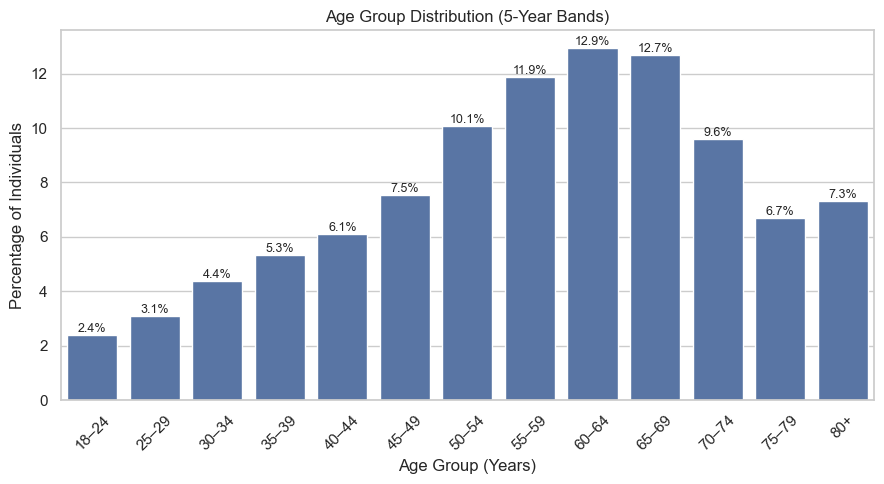

In [199]:
# Helper for categorical variables
def plot_univariate_categorical(df, col, title, xlabel):
    prop_df = (
        df[col]
        .value_counts(normalize=True)
        .reset_index()
    )
    prop_df.columns = [col, "percentage"]
    prop_df["percentage"] = prop_df["percentage"] * 100

    plt.figure(figsize=(9,5))
    ax = sns.barplot(x=col, y="percentage", data=prop_df)

    for p in ax.patches:
        ax.annotate(f"{p.get_height():.1f}%",
                    (p.get_x() + p.get_width()/2, p.get_height()),
                    ha="center", va="bottom", fontsize=9)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Percentage of Individuals")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# Helper for continuous variables
def plot_univariate_continuous(df, col, title, xlabel):
    plt.figure(figsize=(7,4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

## Age Group Distribution

#This plot shows the percentage of individuals in each age category (5-year bands).

# Age category mapping
age_labels = {
    1: "18–24", 2: "25–29", 3: "30–34", 4: "35–39",
    5: "40–44", 6: "45–49", 7: "50–54", 8: "55–59",
    9: "60–64", 10: "65–69", 11: "70–74",
    12: "75–79", 13: "80+"
}

df["AgeGroup"] = df["Age"].map(age_labels).astype("category")

plot_univariate_categorical(
    df,
    col="AgeGroup",
    title="Age Group Distribution (5-Year Bands)",
    xlabel="Age Group (Years)"
)



- Interpretation: Age Group Distribution

The dataset is dominated by middle-aged and older adults, with the highest representation in the 55–69 year age range.

The largest groups are 60–64 (12.9%) and 65–69 (12.7%), indicating that a substantial portion of the sample consists of individuals approaching or in retirement age.

Younger age groups such as 18–24 (2.4%) and 25–29 (3.1%) are underrepresented.

After age 70, the proportion gradually declines, though 80+ (7.3%) still forms a notable segment.

This age distribution is important because cardiovascular risk increases with age.
The strong representation of older adults makes this dataset particularly suitable for studying heart disease risk factors, but it also means that results may be less generalizable to younger populations.


In [200]:
## Sex Distribution

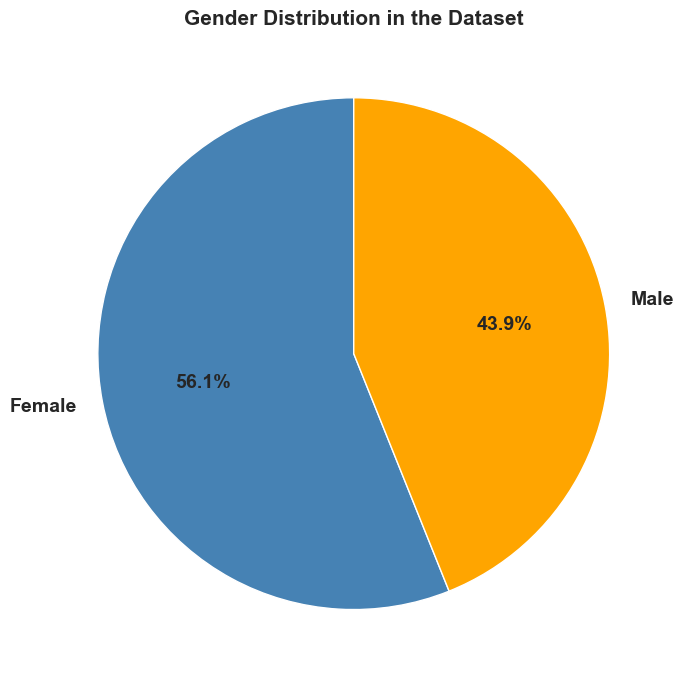

In [201]:
# Count gender values
gender_counts = df["Sex"].value_counts()

# Plot
plt.figure(figsize=(7,7))

plt.pie(
    gender_counts.values,
    labels=gender_counts.index,
    autopct="%.1f%%",
    startangle=90,
    colors=["steelblue", "orange"],
    textprops={"fontsize": 14, "weight": "bold"},
    wedgeprops={"edgecolor": "white", "linewidth": 1}
)

plt.title("Gender Distribution in the Dataset", fontsize=15, fontweight="bold")
plt.axis("equal")  # Perfect circle
plt.tight_layout()
plt.show()


- Interpretation

The dataset consists of approximately 56.1% female and 43.9% male participants, indicating a moderately higher representation of females.

This gender imbalance is important to acknowledge because cardiovascular risk and disease patterns differ by sex due to biological, behavioral, and healthcare-access factors. As a result, subsequent analyses involving heart disease prevalence should be interpreted with consideration of this underlying gender composition.

Including gender as a key demographic variable helps ensure that observed heart disease trends are not misattributed to other factors such as age, lifestyle, or socioeconomic status.

## BMI Distribution

BMI (Body Mass Index) is a continuous variable used to assess obesity levels.


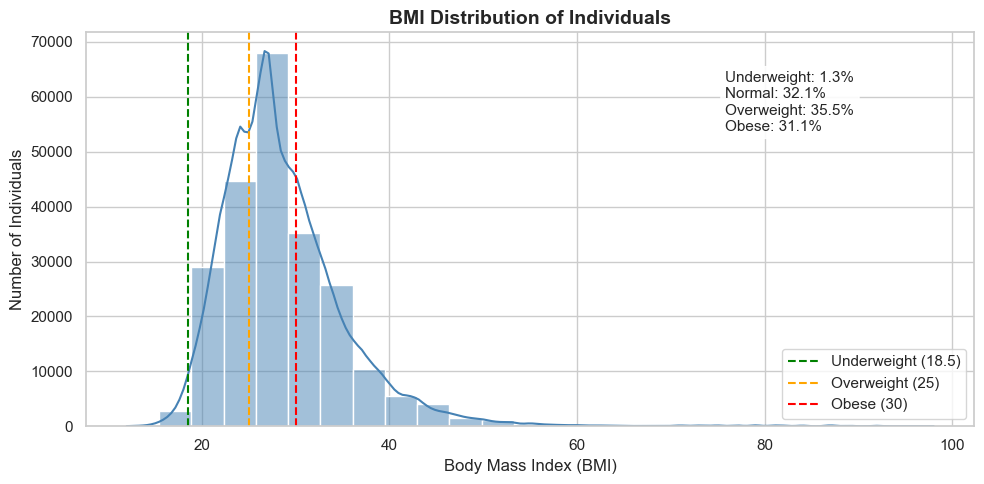

In [202]:
# Create BMI categories
bmi_bins = [0, 18.5, 25, 30, 100]
bmi_labels = ["Underweight", "Normal", "Overweight", "Obese"]

df["BMI_Category"] = pd.cut(df["BMI"], bins=bmi_bins, labels=bmi_labels)

# Calculate percentage
bmi_percent = (
    df["BMI_Category"]
    .value_counts(normalize=True)
    .sort_index() * 100
)
plt.figure(figsize=(10,5))

sns.histplot(
    df["BMI"],
    bins=25,
    kde=True,
    color="steelblue",
    edgecolor="white"
)

plt.title("BMI Distribution of Individuals", fontsize=14, fontweight="bold")
plt.xlabel("Body Mass Index (BMI)", fontsize=12)
plt.ylabel("Number of Individuals", fontsize=12)

# Reference lines
plt.axvline(18.5, color="green", linestyle="--", label="Underweight (18.5)")
plt.axvline(25, color="orange", linestyle="--", label="Overweight (25)")
plt.axvline(30, color="red", linestyle="--", label="Obese (30)")

# Percentage text box
text_str = (
    f"Underweight: {bmi_percent['Underweight']:.1f}%\n"
    f"Normal: {bmi_percent['Normal']:.1f}%\n"
    f"Overweight: {bmi_percent['Overweight']:.1f}%\n"
    f"Obese: {bmi_percent['Obese']:.1f}%"
)

plt.text(
    0.72, 0.75, text_str,
    transform=plt.gca().transAxes,
    fontsize=11,
    bbox=dict(boxstyle="round", facecolor="white", alpha=0.9)
)

plt.legend()
plt.tight_layout()
plt.show()


- The BMI distribution is right-skewed, with most individuals falling in the overweight range. 
Higher BMI is a known risk factor for heart disease.


## Mental Health Days Distribution

This variable indicates the number of days in the past month when mental health was not good.


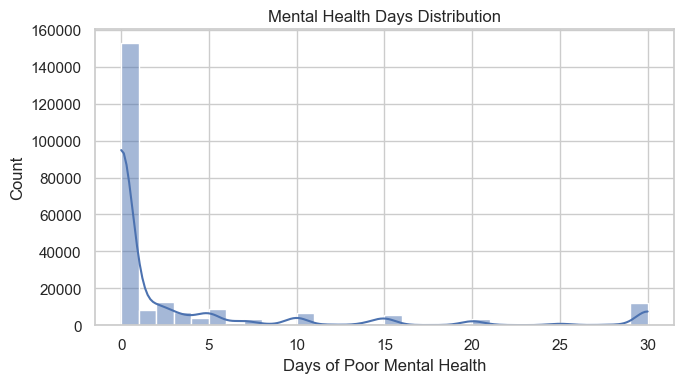

In [203]:
plot_univariate_continuous(
    df,
    col="MentHlth",
    title="Mental Health Days Distribution",
    xlabel="Days of Poor Mental Health"
)


- Most respondents report zero mental health problem days, but a long tail indicates that some individuals experience frequent mental health issues.


## Physical Health Days Distribution

This variable represents the number of days in the past month when physical health was not good.


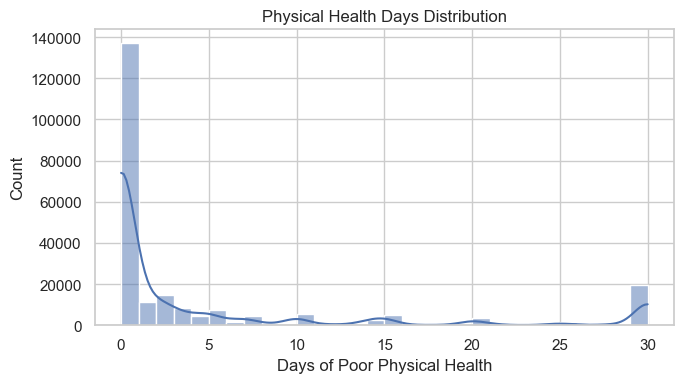

In [204]:
plot_univariate_continuous(
    df,
    col="PhysHlth",
    title="Physical Health Days Distribution",
    xlabel="Days of Poor Physical Health"
)


- Similar to mental health, most individuals report zero physical health problem days, but a subset experiences frequent physical discomfort.


### Education Level Distribution

This plot shows the percentage of individuals across different education levels.


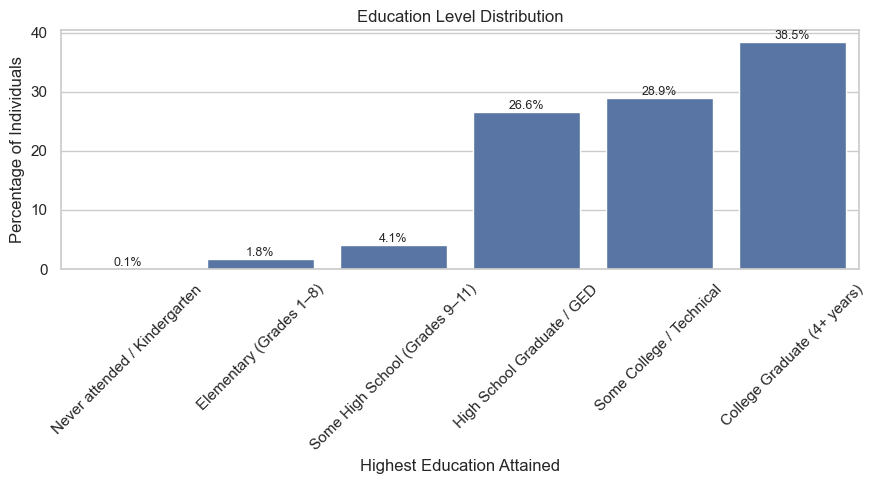

In [205]:
# Education level mapping (from codebook)
education_labels = {
    1: "Never attended / Kindergarten",
    2: "Elementary (Grades 1–8)",
    3: "Some High School (Grades 9–11)",
    4: "High School Graduate / GED",
    5: "Some College / Technical",
    6: "College Graduate (4+ years)"
}

# Define correct order (lowest → highest)
education_order = [
    "Never attended / Kindergarten",
    "Elementary (Grades 1–8)",
    "Some High School (Grades 9–11)",
    "High School Graduate / GED",
    "Some College / Technical",
    "College Graduate (4+ years)"
]

# Apply mapping + enforce ordered categorical type
df["EducationLevel"] = (
    df["Education"]
    .map(education_labels)
    .astype("category")
)

df["EducationLevel"] = df["EducationLevel"].cat.set_categories(
    education_order,
    ordered=True
)

# Plot
plot_univariate_categorical(
    df,
    col="EducationLevel",
    title="Education Level Distribution",
    xlabel="Highest Education Attained"
)


- Interpretation: Education Level Distribution

The dataset is predominantly composed of individuals with higher educational attainment.

The largest group consists of college graduates (4+ years), representing 38.5% of the sample.

A substantial proportion has some college or technical education (28.9%), indicating strong post-secondary participation.

High school graduates (26.6%) also form a major segment of the population.

In contrast, lower education levels are underrepresented:

Only 1.8% have elementary education (Grades 1–8).

Just 0.1% report never attending school or only kindergarten.

4.1% completed some high school (Grades 9–11).

This skew toward higher education suggests the dataset reflects a relatively educated population, which may influence observed health behaviors, access to healthcare, and disease outcomes.
Therefore, findings related to socioeconomic factors should be interpreted with caution when generalizing to populations with lower educational attainment.

## (b) Investigate Prevalence of Health Conditions

We analyze:

HighBP

HighChol

Smoker

Diabetes

Alcohol Consumption

## High Blood Pressure (HighBP) Distribution

This variable indicates whether an individual has been diagnosed with high blood pressure, a major risk factor for heart disease.


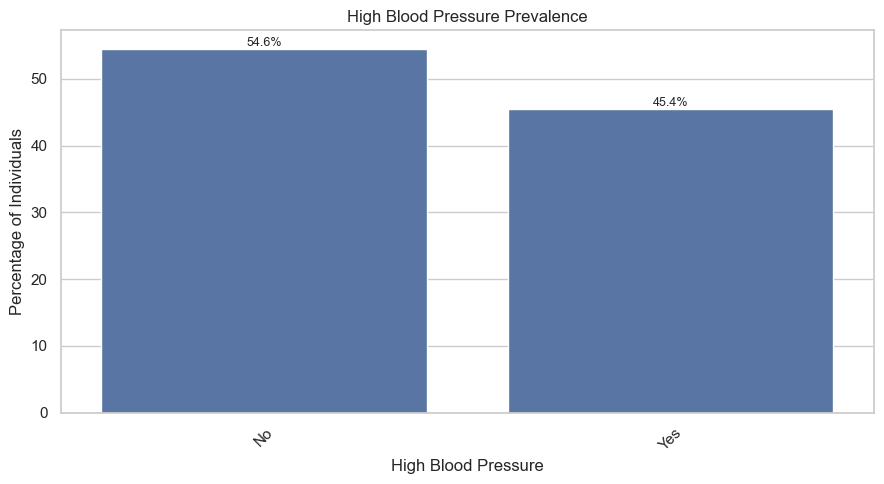

In [206]:
plot_univariate_categorical(
    df,
    col="HighBP",
    title="High Blood Pressure Prevalence",
    xlabel="High Blood Pressure"
)


- A significant portion of the population has high blood pressure (45.44 %), making it a major cardiovascular risk factor.


## High Cholesterol (HighChol) Distribution

This variable represents whether an individual has high cholesterol levels, which can contribute to the buildup of plaque in arteries.


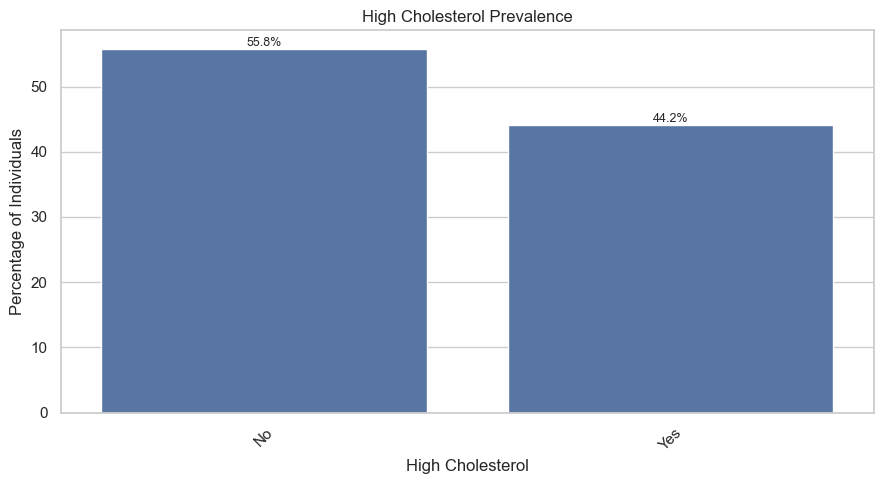

In [207]:
plot_univariate_categorical(
    df,
    col="HighChol",
    title="High Cholesterol Prevalence",
    xlabel="High Cholesterol"
)


- High cholesterol is also prevalent in the dataset (44.2 %), further increasing cardiovascular risk.


## Smoking Status (Smoker) Distribution

This variable shows whether an individual has smoked at least 100 cigarettes in their lifetime, indicating long-term exposure to smoking-related health risks.


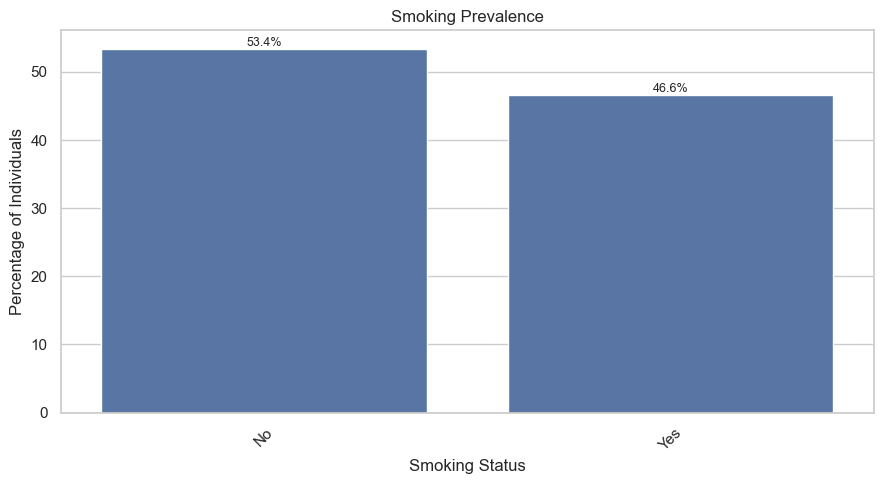

In [208]:
plot_univariate_categorical(
    df,
    col="Smoker",
    title="Smoking Prevalence",
    xlabel="Smoking Status"
)


- A large proportion of respondents have smoked at least 100 cigarettes in their lifetime (46.6 %), indicating widespread exposure to smoking-related health risks.


## Diabetes Status Distribution

This variable categorizes individuals into no diabetes, prediabetes, or diabetes, all of which are important factors influencing cardiovascular health.


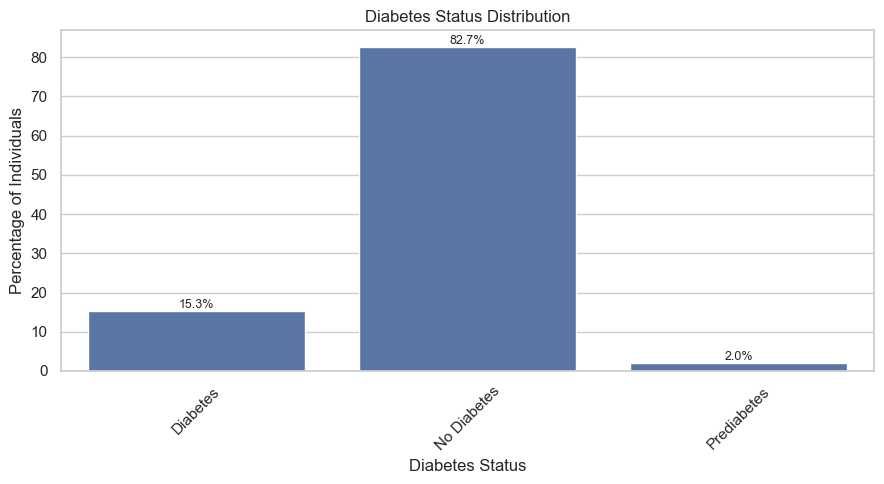

In [209]:
plot_univariate_categorical(
    df,
    col="Diabetes",
    title="Diabetes Status Distribution",
    xlabel="Diabetes Status"
)


- Most respondents do not have diabetes, but a noticeable portion fall into prediabetes (2 %) or diabetes (15.3 %) categories, which are important risk factors for heart disease.


### Heavy Alcohol Consumption Prevalence

This variable identifies individuals who consume alcohol at heavy levels, which is a known cardiovascular risk factor.


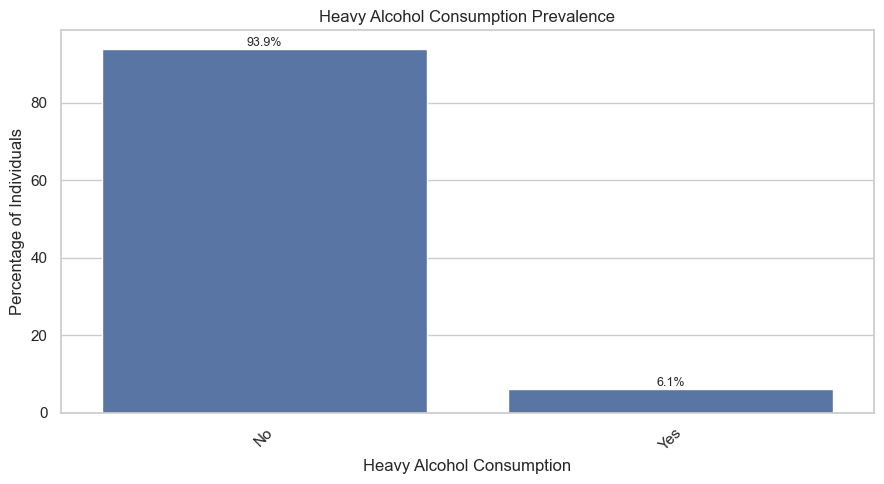

In [210]:
plot_univariate_categorical(
    df,
    col="HvyAlcoholConsump",
    title="Heavy Alcohol Consumption Prevalence",
    xlabel="Heavy Alcohol Consumption"
)


- A smaller but notable proportion of respondents are heavy alcohol consumers around 6.1 % 
Even though this group is not the majority, heavy drinking significantly increases cardiovascular risk.


## (c) Distribution of Heart Disease (Target Variable)

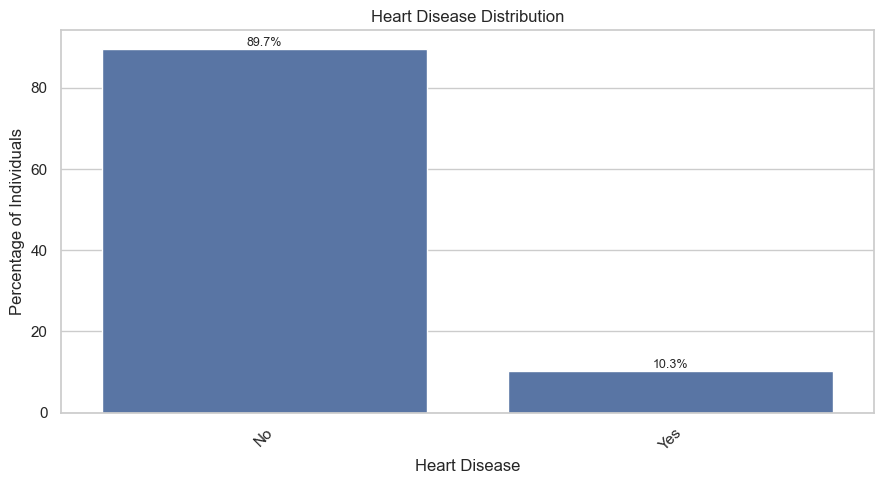

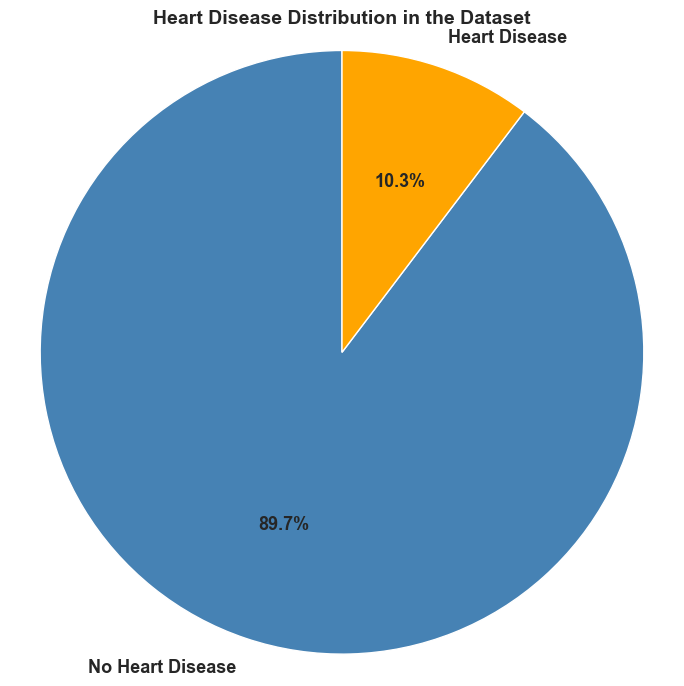

In [211]:
plot_univariate_categorical(
    df,
    col="HeartDiseaseorAttack",
    title="Heart Disease Distribution",
    xlabel="Heart Disease"
)
# Prepare data
heart_counts = df["HeartDiseaseorAttack"].value_counts()

labels = ["No Heart Disease", "Heart Disease"]
sizes = heart_counts.values
colors = ["steelblue", "orange"]  # Professional color palette

# Plot
plt.figure(figsize=(7,7))  # Square figure

plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct="%.1f%%",
    startangle=90,
    textprops={"fontsize": 13, "fontweight": "bold"},  # Bigger & bold labels
    wedgeprops={"edgecolor": "white", "linewidth": 1}
)

plt.title(
    "Heart Disease Distribution in the Dataset",
    fontsize=14,
    fontweight="bold"
)

plt.axis("equal")  # Keeps the pie circular
plt.tight_layout()
plt.show()




- Heart Disease Distribution (Target Variable) — Interpretation

The dataset shows a highly imbalanced distribution of the target variable.

Approximately 89.7% of individuals do not have heart disease, while only 10.3% report having coronary heart disease or a previous heart attack.

This imbalance indicates that heart disease cases represent a minority class in the dataset. Such class imbalance is important to consider in later analytical or predictive modeling stages, as standard models may become biased toward the majority (non–heart disease) group.

From an epidemiological perspective, the results suggest that while heart disease affects a smaller portion of the population, it remains a significant public health concern due to its strong association with multiple health, lifestyle, and socioeconomic risk factors observed in the analysis.

## Univariate Analysis Summary

The univariate analysis highlights a population with high prevalence of cardiovascular risk factors including obesity, hypertension, high cholesterol, smoking, and diabetes.

Most individuals report good mental and physical health, yet a notable minority experiences chronic issues.

The dataset’s age structure and health patterns make it suitable for studying heart disease risk.


# Bivariate Analysis 

Bivariate analysis examines the relationship between two variables to understand how changes in one variable influence another.

In this section, we analyze how key health, lifestyle, and demographic factors are associated with heart disease.


## (a) Explore Relationships with Heart Disease

We compare variables WITH and WITHOUT heart disease.

### High Blood Pressure vs Heart Disease


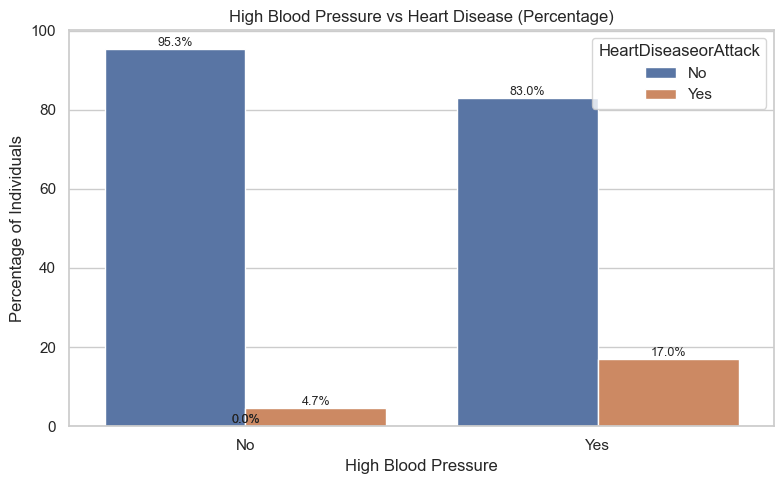

In [212]:
# Helper Function 
def plot_bivariate_percentage(df, x_col, hue_col, title, xlabel):
    # Calculate counts correctly
    prop_df = (
        df.groupby([x_col, hue_col], observed=True)
        .size()
        .reset_index(name="count")
    )
    
    # Convert to percentages within each x category
    prop_df["percentage"] = prop_df.groupby(x_col, observed=True)["count"].transform(
        lambda x: x / x.sum() * 100
    )
    
    # Plot
    plt.figure(figsize=(8,5))
    ax = sns.barplot(
        data=prop_df,
        x=x_col,
        y="percentage",
        hue=hue_col
    )
    
    # Add percentage labels
    for p in ax.patches:
        ax.annotate(
            f"{p.get_height():.1f}%",
            (p.get_x() + p.get_width()/2, p.get_height()),
            ha="center",
            va="bottom",
            fontsize=9
        )
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Percentage of Individuals")
    plt.tight_layout()
    plt.show()



plot_bivariate_percentage(
    df,
    x_col="HighBP",
    hue_col="HeartDiseaseorAttack",
    title="High Blood Pressure vs Heart Disease (Percentage)",
    xlabel="High Blood Pressure"
)



- Individuals with high blood pressure show a substantially higher percentage of heart disease cases compared to those without hypertension, reinforcing hypertension as a major cardiovascular risk factor.

### High Cholesterol vs Heart Disease


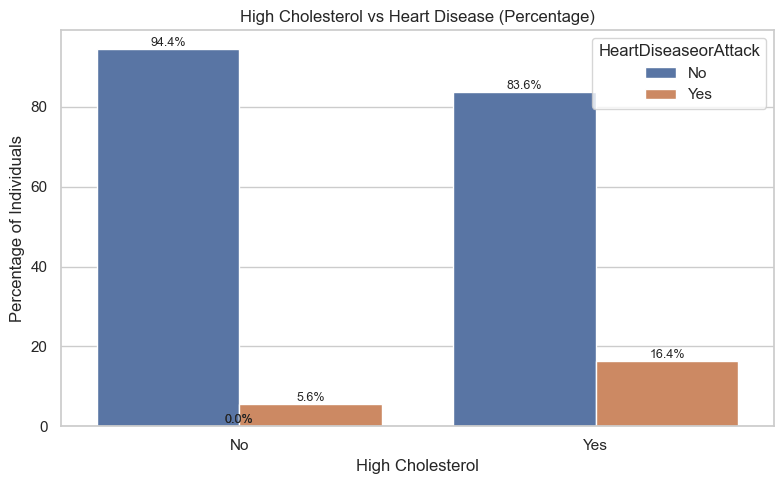

In [213]:
plot_bivariate_percentage(
    df,
    x_col="HighChol",
    hue_col="HeartDiseaseorAttack",
    title="High Cholesterol vs Heart Disease (Percentage)",
    xlabel="High Cholesterol"
)


- High cholesterol is associated with an increased prevalence of heart disease, highlighting its role in cardiovascular risk.


### Smoking vs Heart Disease


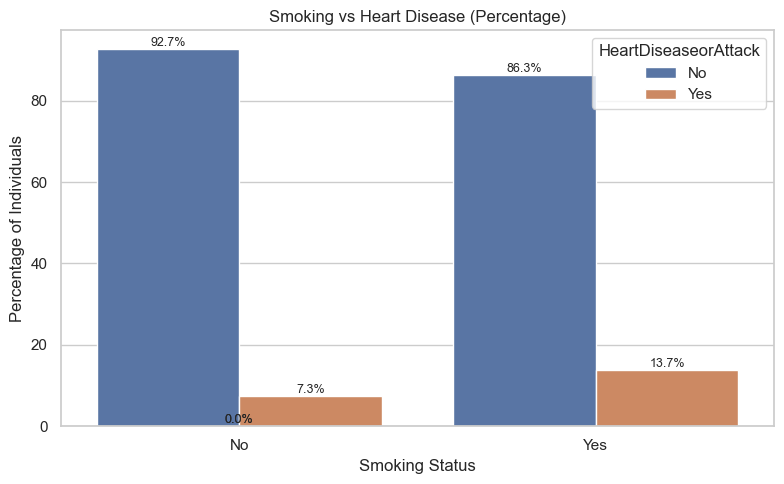

In [214]:
plot_bivariate_percentage(
    df,
    x_col="Smoker",
    hue_col="HeartDiseaseorAttack",
    title="Smoking vs Heart Disease (Percentage)",
    xlabel="Smoking Status"
)


- Smokers exhibit a higher percentage of heart disease cases, confirming smoking as a significant modifiable risk factor for cardiovascular disease.


### Heavy Alcohol Consumption vs Heart Disease


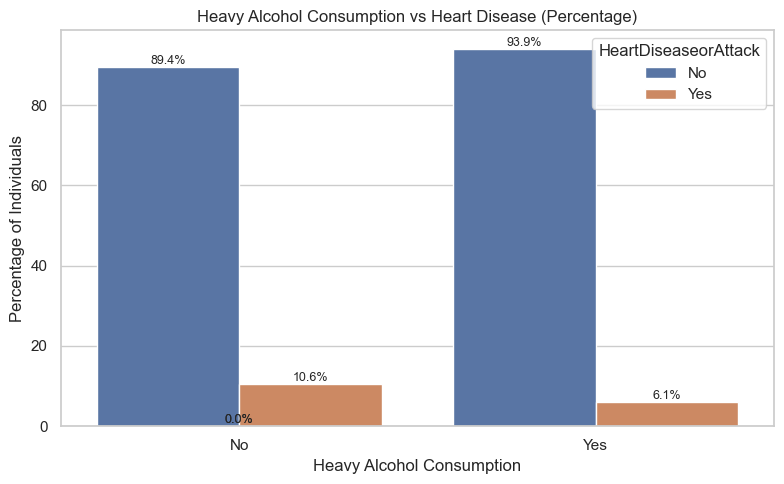

In [215]:
plot_bivariate_percentage(
    df,
    x_col="HvyAlcoholConsump",
    hue_col="HeartDiseaseorAttack",
    title="Heavy Alcohol Consumption vs Heart Disease (Percentage)",
    xlabel="Heavy Alcohol Consumption"
)


- Although heavy alcohol consumption is a known cardiovascular risk factor, the dataset shows a lower heart disease prevalence among heavy drinkers.

- This is likely due to confounding effects such as younger age distribution, survivorship bias, and the limitation that the variable captures current drinking behavior rather than long-term alcohol exposure.

- Therefore, this result should be interpreted cautiously and does not contradict established medical evidence.



#### Why Analyze Alcohol, Age, and Heart Disease Together?

Initial bivariate analysis showed that heavy alcohol consumers appeared to have a lower prevalence of heart disease. 

However, age is one of the strongest risk factors for cardiovascular disease. Younger individuals are more likely to engage in heavy drinking and also naturally have lower heart disease rates.

To avoid misleading conclusions, we perform a stratified analysis by age to understand whether alcohol consumption still appears protective after accounting for age.


### Heart Disease by Age and Heavy Alcohol Consumption



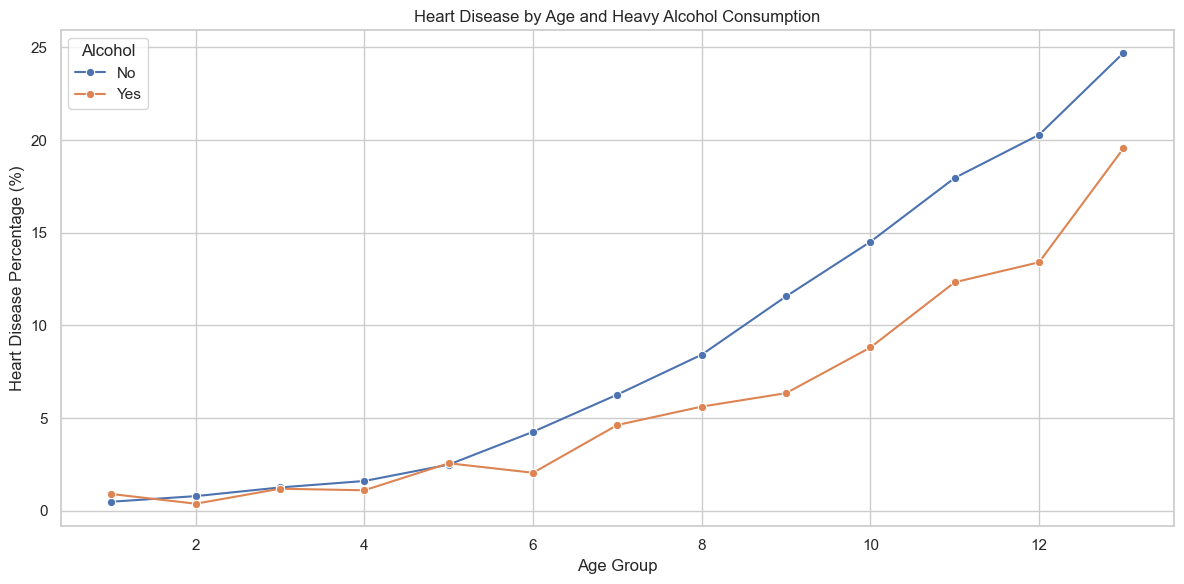

In [216]:
# Create the cross-tab
alcohol_age_counts = pd.crosstab(
    [df["Age"], df["HvyAlcoholConsump"]],
    df["HeartDiseaseorAttack"]
)

# Convert to percentages
alcohol_age_percent = alcohol_age_counts.div(
    alcohol_age_counts.sum(axis=1), axis=0
) * 100

alcohol_age_percent.columns = ["No %", "Yes %"]

# Prepare for plotting
plot_data = alcohol_age_percent.reset_index()
plot_data.columns = ["Age", "Alcohol", "No %", "Yes %"]

# Ensure Age is numeric
plot_data["Age"] = plot_data["Age"].astype(int)

# ---- PLOT ----
plt.figure(figsize=(12,6))

sns.lineplot(
    data=plot_data,
    x="Age",
    y="Yes %",
    hue="Alcohol",   # <-- Uses "No" / "Yes" directly
    marker="o"
)

plt.title("Heart Disease by Age and Heavy Alcohol Consumption")
plt.xlabel("Age Group")
plt.ylabel("Heart Disease Percentage (%)")
plt.tight_layout()
plt.show()


### Interpretation

Heart disease prevalence increases steadily with age for both heavy drinkers and non-heavy drinkers, confirming age as the strongest risk factor for cardiovascular disease.

Across nearly all age groups, individuals who do not engage in heavy alcohol consumption show slightly higher heart disease prevalence than heavy drinkers. However, this does not imply that heavy alcohol consumption is protective.

The lower heart disease rates among heavy drinkers are primarily due to their younger age distribution and possible survivorship and reporting biases. This variable captures current drinking behavior rather than long-term alcohol exposure, which limits its ability to reflect cumulative cardiovascular damage.

This analysis demonstrates that age is a major confounding factor in the relationship between alcohol consumption and heart disease. Therefore, simple bivariate results should be interpreted cautiously, and alcohol should not be considered a protective factor based on this dataset alone.


### Diabetes vs Heart Disease


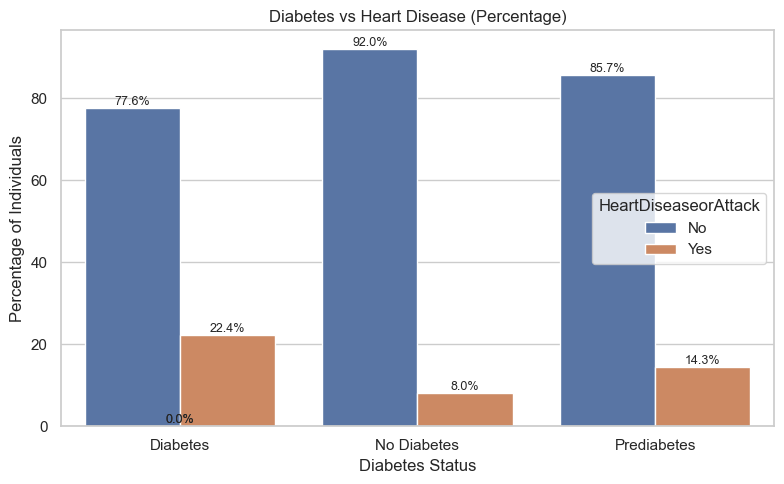

In [217]:
plot_bivariate_percentage(
    df,
    x_col="Diabetes",
    hue_col="HeartDiseaseorAttack",
    title="Diabetes vs Heart Disease (Percentage)",
    xlabel="Diabetes Status"
)


- Heart disease prevalence increases sharply among individuals with diabetes ,followed by prediabetes and then no diabetes indicating a strong link between blood sugar regulation and cardiovascular health.


### BMI vs Heart Disease


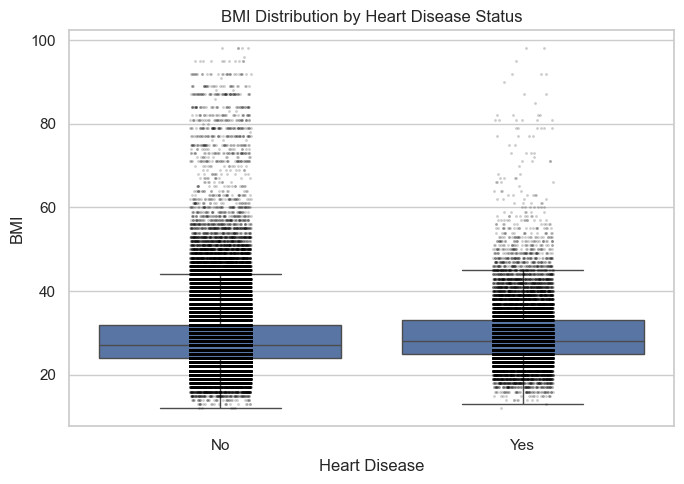

In [218]:
plt.figure(figsize=(7,5))

sns.boxplot(
    x="HeartDiseaseorAttack",
    y="BMI",
    data=df,
    showfliers=False
)

sns.stripplot(
    x="HeartDiseaseorAttack",
    y="BMI",
    data=df,
    color="black",
    alpha=0.2,
    size=2
    
    
)

plt.title("BMI Distribution by Heart Disease Status")
plt.xlabel("Heart Disease")
plt.ylabel("BMI")
plt.tight_layout()
plt.show()


### Interpretation

Individuals with heart disease show a slightly higher median BMI compared to those without heart disease.

The overall BMI distribution for heart disease patients is shifted toward higher values, indicating that overweight and obesity are more common in this group.

This supports existing medical evidence that elevated BMI is a significant risk factor for cardiovascular disease, likely due to its association with hypertension, diabetes, and lipid abnormalities.


### Physical Activity vs Heart Disease


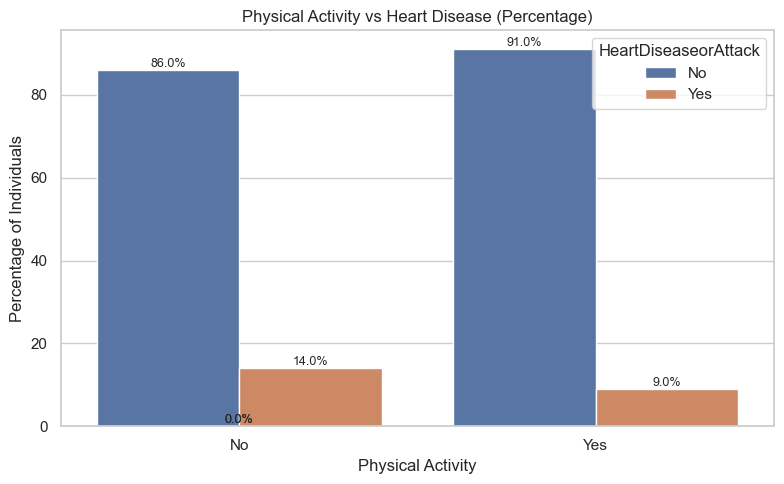

In [219]:
plot_bivariate_percentage(
    df,
    x_col="PhysActivity",
    hue_col="HeartDiseaseorAttack",
    title="Physical Activity vs Heart Disease (Percentage)",
    xlabel="Physical Activity"
)


### Interpretation: Physical Activity vs Heart Disease

Individuals who reported engaging in physical activity in the past 30 days show a noticeably lower percentage of heart disease compared to those who were physically inactive.

Approximately 14 percent of physically inactive individuals have heart disease, whereas only around 9 percent of physically active individuals are affected.  

This indicates that regular physical activity acts as a protective factor against cardiovascular disease by improving heart function, reducing blood pressure, and helping maintain healthy body weight.


### General Health vs Heart Disease


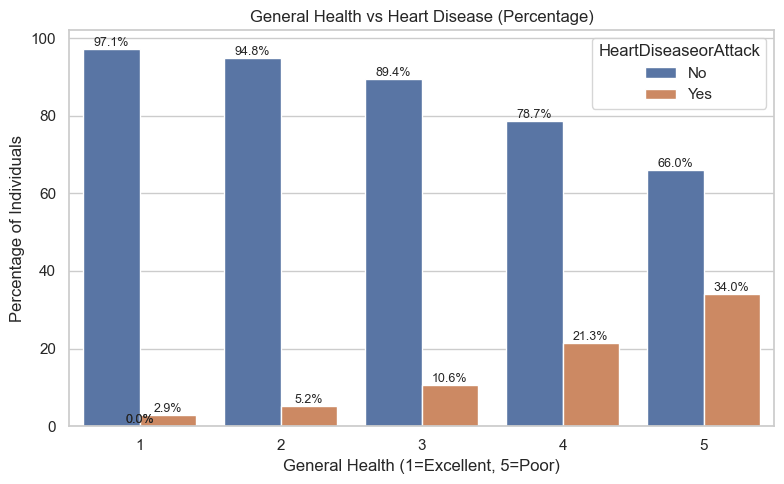

In [220]:
plot_bivariate_percentage(
    df,
    x_col="GenHlth",
    hue_col="HeartDiseaseorAttack",
    title="General Health vs Heart Disease (Percentage)",
    xlabel="General Health (1=Excellent, 5=Poor)"
)


### Interpretation: General Health vs Heart Disease

Heart disease prevalence increases sharply as self-reported general health declines. Individuals reporting poor health exhibit more than a tenfold higher risk of heart disease compared to those reporting excellent health. This demonstrates that general health status is a strong and meaningful indicator of cardiovascular risk in the population.

### Mental Health vs Heart Disease

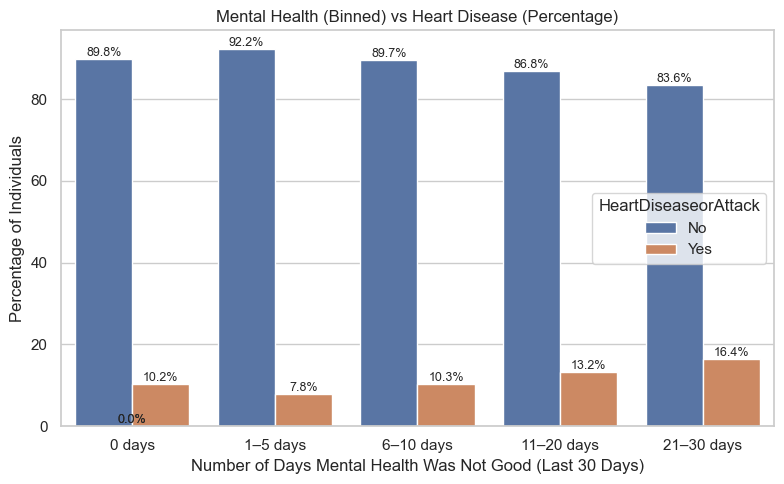

In [221]:
# Create mental health bins for clearer analysis
bins = [-1, 0, 5, 10, 20, 30]
labels = ["0 days", "1–5 days", "6–10 days", "11–20 days", "21–30 days"]

df["MentHlth_Binned"] = pd.cut(df["MentHlth"], bins=bins, labels=labels)
plot_bivariate_percentage(
    df,
    x_col="MentHlth_Binned",
    hue_col="HeartDiseaseorAttack",
    title="Mental Health (Binned) vs Heart Disease (Percentage)",
    xlabel="Number of Days Mental Health Was Not Good (Last 30 Days)"
)


- Interpretation

Heart disease prevalence increases as the number of poor mental health days rises.

Individuals reporting no mental health issues (0 days) show a heart disease prevalence of approximately 10.2%.

Those with 1–5 bad mental health days have the lowest prevalence at around 7.8%, possibly reflecting short-term stress rather than chronic mental distress.

As the number of poor mental health days increases, heart disease prevalence rises steadily:

• 6–10 days: ~10.3%
• 11–20 days: ~13.2%
• 21–30 days: ~16.4%

This trend suggests that chronic or frequent mental health problems are associated with a higher risk of heart disease.

The relationship is likely driven by shared risk factors such as long-term stress, lifestyle behaviors, sleep disruption, and underlying physical health conditions. However, this analysis is correlational and does not imply causation.

### Stroke vs Heart Disease


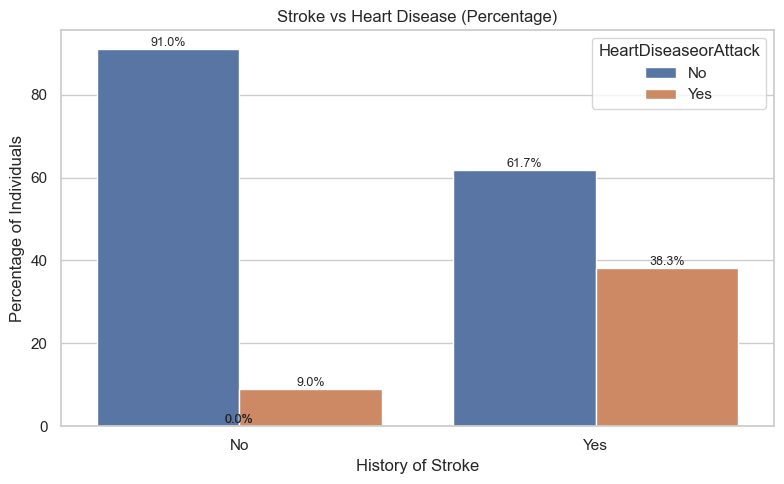

In [222]:
plot_bivariate_percentage(
    df,
    x_col="Stroke",
    hue_col="HeartDiseaseorAttack",
    title="Stroke vs Heart Disease (Percentage)",
    xlabel="History of Stroke"
)


### Interpretation: Stroke vs Heart Disease

Individuals with a history of stroke show a dramatically higher prevalence of heart disease compared to those without a stroke history.

While only about 9 percent of people without a stroke have heart disease, nearly 38 percent of those who have suffered a stroke also have heart disease.

This highlights the strong clinical link between stroke and heart disease, as both share common risk factors such as high blood pressure, cholesterol imbalance, and vascular damage.


### Mobility Difficulty vs Heart Disease


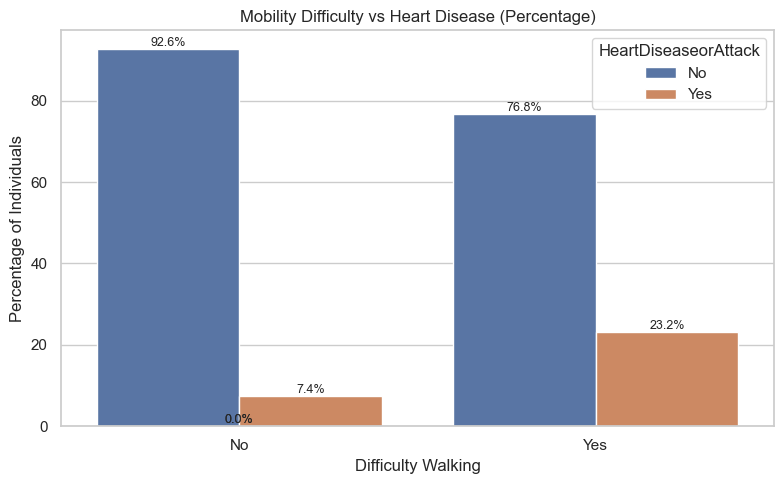

In [223]:
plot_bivariate_percentage(
    df,
    x_col="DiffWalk",
    hue_col="HeartDiseaseorAttack",
    title="Mobility Difficulty vs Heart Disease (Percentage)",
    xlabel="Difficulty Walking"
)


### Interpretation: Mobility Difficulty vs Heart Disease

People who report serious difficulty walking or climbing stairs have a significantly higher prevalence of heart disease.

Around 23 percent of individuals with mobility difficulties have heart disease, compared to only about 7 percent among those without such difficulties.

This suggests that reduced physical mobility may reflect underlying cardiovascular problems, chronic illness, or reduced physical activity levels, all of which contribute to increased heart disease risk.


### Fruit Consumption vs Heart Disease

Fruits
Yes    140848
No      88933
Name: count, dtype: int64
category


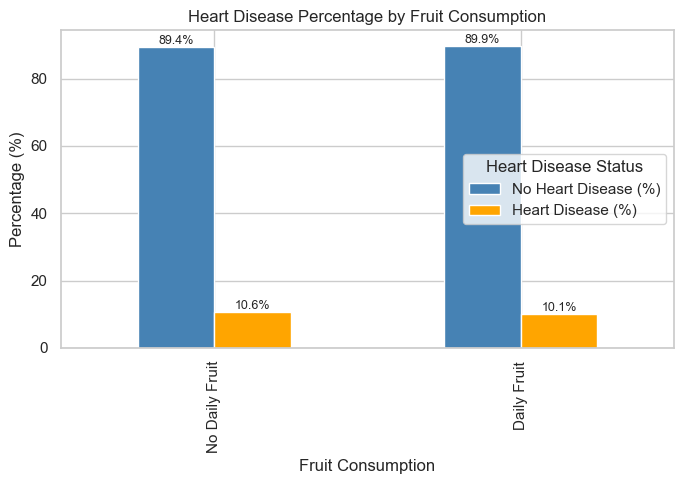

In [224]:
# Check raw distribution
print(df["Fruits"].value_counts())
print(df["Fruits"].dtype)

# Crosstab
fruit_table = pd.crosstab(df["Fruits"], df["HeartDiseaseorAttack"])

# Convert to percentage
fruit_percent = fruit_table.div(fruit_table.sum(axis=1), axis=0) * 100
fruit_percent.columns = ["No Heart Disease (%)", "Heart Disease (%)"]

# Rename index for readability
fruit_percent.index = ["No Daily Fruit", "Daily Fruit"]

# Plot
ax = fruit_percent.plot(
    kind="bar",
    figsize=(7,5),
    color=["steelblue", "orange"]
)

plt.title("Heart Disease Percentage by Fruit Consumption")
plt.xlabel("Fruit Consumption")
plt.ylabel("Percentage (%)")
plt.legend(title="Heart Disease Status")
plt.tight_layout()

for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="edge", fontsize=9)

plt.show()


- Interpretation

Heart disease prevalence is very similar between individuals who consume fruit daily and those who do not.

No Daily Fruit: ~10.6% have heart disease

Daily Fruit: ~10.1% have heart disease

This suggests that fruit consumption alone, as measured in this dataset, does not show a strong association with heart disease risk.

However, this variable only captures whether fruit is consumed daily, not quantity, variety, or overall dietary quality. Therefore, the lack of a strong difference does not imply that fruit intake has no cardiovascular benefits.

### Vegetables vs Heart Disease

Veggies
Yes    182633
No      47148
Name: count, dtype: int64
category


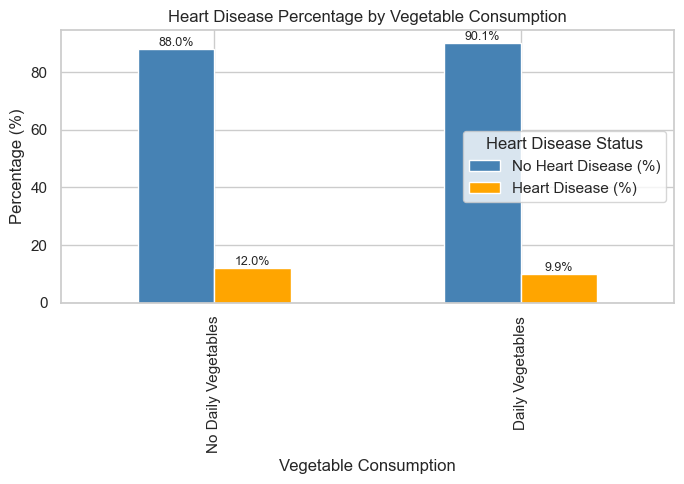

In [225]:
# Check raw distribution
print(df["Veggies"].value_counts())
print(df["Veggies"].dtype)

# Crosstab
veggie_table = pd.crosstab(df["Veggies"], df["HeartDiseaseorAttack"])

# Convert to percentage
veggie_percent = veggie_table.div(veggie_table.sum(axis=1), axis=0) * 100
veggie_percent.columns = ["No Heart Disease (%)", "Heart Disease (%)"]

# Rename index for readability
veggie_percent.index = ["No Daily Vegetables", "Daily Vegetables"]

# Plot
ax = veggie_percent.plot(
    kind="bar",
    figsize=(7,5),
    color=["steelblue", "orange"]
)

plt.title("Heart Disease Percentage by Vegetable Consumption")
plt.xlabel("Vegetable Consumption")
plt.ylabel("Percentage (%)")
plt.legend(title="Heart Disease Status")
plt.tight_layout()

for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="edge", fontsize=9)

plt.show()


- Interpretation

Individuals who consume vegetables daily have a slightly lower heart disease prevalence:

No Daily Vegetables: ~12.0%

Daily Vegetables: ~9.9%

This suggests that regular vegetable consumption may be associated with better cardiovascular outcomes.

Vegetables contribute to heart health through fiber, antioxidants, and micronutrients. However, like fruit, this variable does not capture portion size or overall diet quality, so the observed effect is modest.

### Key Takeaways from Lifestyle & Health Factors

The analysis reveals that lifestyle and functional health play a crucial role in cardiovascular outcomes.

Physical inactivity is associated with a higher prevalence of heart disease, highlighting the protective role of regular exercise. Individuals reporting poor general health show significantly higher cardiovascular risk, reinforcing the importance of overall health status as a strong predictor of heart disease.

A history of stroke is strongly linked to heart disease, indicating shared underlying cardiovascular risk factors. Similarly, individuals with mobility limitations (difficulty walking or climbing stairs) experience much higher heart disease prevalence, reflecting the impact of physical function on long-term heart health.

Mental health also shows a meaningful association. Individuals experiencing frequent poor mental health days have higher heart disease prevalence, suggesting that chronic stress and psychological distress may contribute to cardiovascular risk.

Dietary patterns show more modest effects. Daily vegetable consumption is associated with slightly lower heart disease prevalence, while fruit consumption alone does not show a strong independent relationship. This likely reflects the simplified nature of the dietary measures in the dataset.

Overall, these findings emphasize the importance of preventive healthcare, early screening, physical activity, mental well-being, and lifestyle interventions in reducing the burden of heart disease.


## (b) Visualize Correlations Between Variables and with target variables

We use correlation matrix for numeric variables.

### Correlation Matrix of Key Numeric Variables

This heatmap shows the strength and direction of relationships between important numeric health and demographic variables.
Correlation values range from -1 to +1, where higher absolute values indicate stronger relationships.


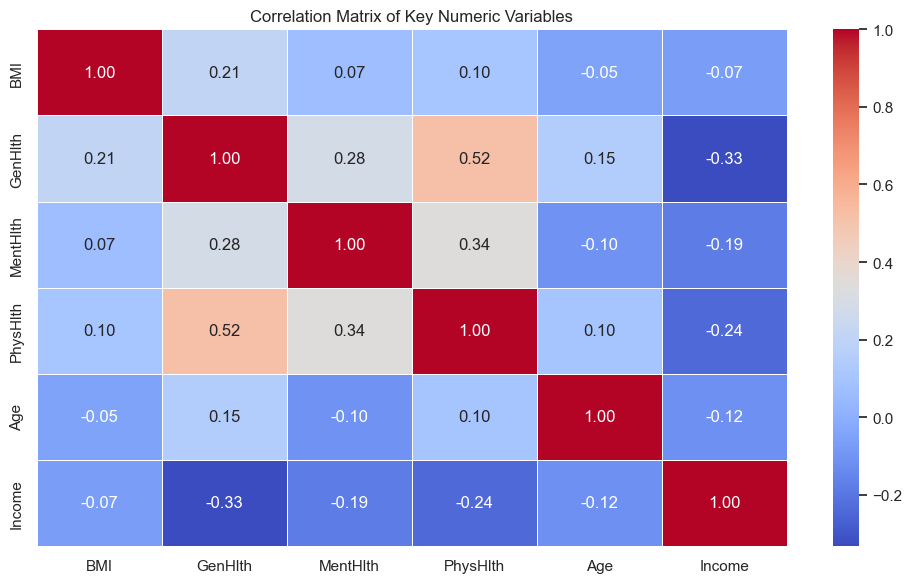

In [226]:
# Select key numeric variables for correlation analysis
numeric_cols = ["BMI", "GenHlth", "MentHlth", "PhysHlth", "Age", "Income"]

# Create correlation matrix
corr_matrix = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap="coolwarm", 
            fmt=".2f",
            linewidths=0.5)

plt.title("Correlation Matrix of Key Numeric Variables")
plt.tight_layout()
plt.show()


### Interpretation: Correlation Matrix of Key Numeric Variables

The correlation matrix highlights the relationships between important health and demographic variables.

General Health (GenHlth) shows a strong positive correlation with Physical Health days (PhysHlth = 0.52) and a moderate correlation with Mental Health days (MentHlth = 0.28).  
This indicates that individuals who rate their general health as poorer also tend to experience more frequent physical and mental health problems.

Mental Health and Physical Health are moderately correlated (0.34), suggesting that psychological well-being and physical health are closely linked.

Income shows a negative correlation with General Health (-0.33), Physical Health (-0.24), and Mental Health (-0.19).  
This implies that individuals with lower income levels tend to report poorer overall health and more frequent health-related issues.

Age has weak correlations with most variables, indicating that while age is an important risk factor for heart disease, it does not strongly influence short-term mental or physical health days in this dataset.

BMI shows weak correlations with other variables, suggesting that its impact on heart disease may operate indirectly through conditions such as high blood pressure, diabetes, and cholesterol rather than through general health perception alone.

Overall, the matrix confirms that general health status, physical health problems, mental health issues, and income levels are interconnected and play a meaningful role in understanding cardiovascular risk patterns.


### Correlation of Health Indicators with Heart Disease (Target Variable)

- This analysis examines how different health, lifestyle, and demographic factors are correlated with the presence of heart disease.

- and for doing this - We will:

Create a numeric version of the target

Use only meaningful numeric predictors

Build a clean correlation matrix

Visualize it professionally

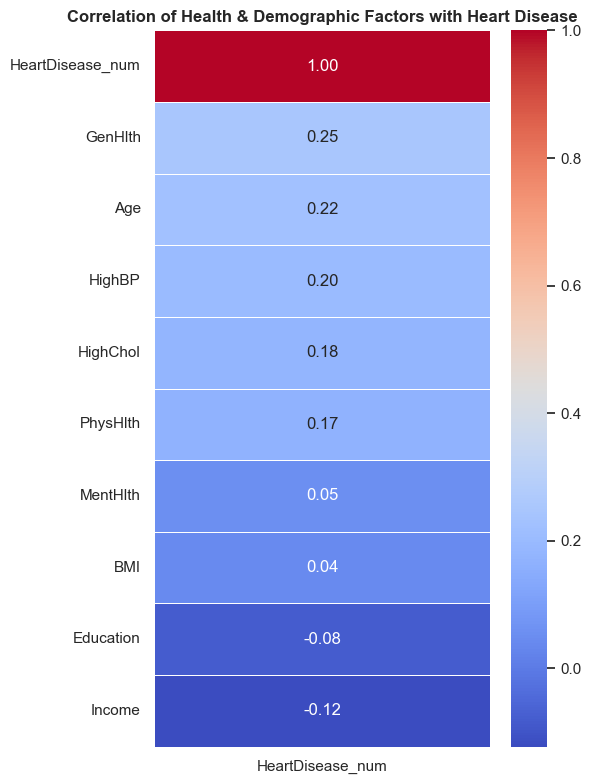

In [227]:
binary_cols = [
    "HeartDiseaseorAttack",
    "HighBP",
    "HighChol"
]

for col in binary_cols:
    df[col] = df[col].map({"No": 0, "Yes": 1})
df["HeartDisease_num"] = df["HeartDiseaseorAttack"]
corr_cols = [
    "HeartDisease_num",
    "BMI",
    "GenHlth",
    "HighBP",
    "HighChol",
    "MentHlth",
    "PhysHlth",
    "Age",
    "Education",
    "Income"
]

corr_df = df[corr_cols]
corr_matrix = corr_df.corr()

target_corr = corr_matrix[["HeartDisease_num"]].sort_values(
    by="HeartDisease_num", ascending=False
)
plt.figure(figsize=(6,8))

sns.heatmap(
    target_corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)

plt.title("Correlation of Health & Demographic Factors with Heart Disease",
          fontsize=12, fontweight="bold")

plt.tight_layout()
plt.show()


### Interpretation: Correlation of Health & Demographic Factors with Heart Disease

The correlation analysis highlights how key health and demographic factors are associated with the presence of heart disease.

General Health (GenHlth) shows the strongest positive correlation with heart disease (0.25).
This indicates that individuals who report poorer overall health are significantly more likely to have cardiovascular conditions. Self-rated general health captures the combined impact of multiple chronic and functional health issues.

Age also exhibits a strong positive association (0.22), confirming that heart disease risk increases with advancing age due to cumulative exposure to metabolic, lifestyle, and vascular risk factors.

High Blood Pressure (HighBP) (0.20) and High Cholesterol (HighChol) (0.18) both show meaningful positive correlations with heart disease.
These results align with clinical evidence that hypertension and elevated cholesterol are major contributors to cardiovascular risk.

Physical Health (PhysHlth) has a moderate positive correlation (0.17), suggesting that individuals experiencing more frequent physical health problems are more likely to suffer from heart disease.

Mental Health (MentHlth) (0.05) and BMI (0.04) show weak positive correlations.
While both factors influence cardiovascular health, their direct linear association with heart disease is smaller compared to general health, age, and clinical risk factors.

Education (-0.08) and Income (-0.12) are negatively correlated with heart disease.
This suggests that individuals with higher socioeconomic status tend to have lower heart disease prevalence, likely due to better access to healthcare, healthier lifestyles, and improved health awareness.

Overall, the strongest associations with heart disease are observed for poor general health, older age, high blood pressure, and high cholesterol, while higher income and education appear to offer a protective effect.


## (c) Compare Heart Disease Across Demographic Groups


In this section, we analyze how heart disease prevalence varies across key demographic factors such as gender, age, and education level.


### Heart Disease by Gender


Sex
Female    128854
Male      100927
Name: count, dtype: int64
category


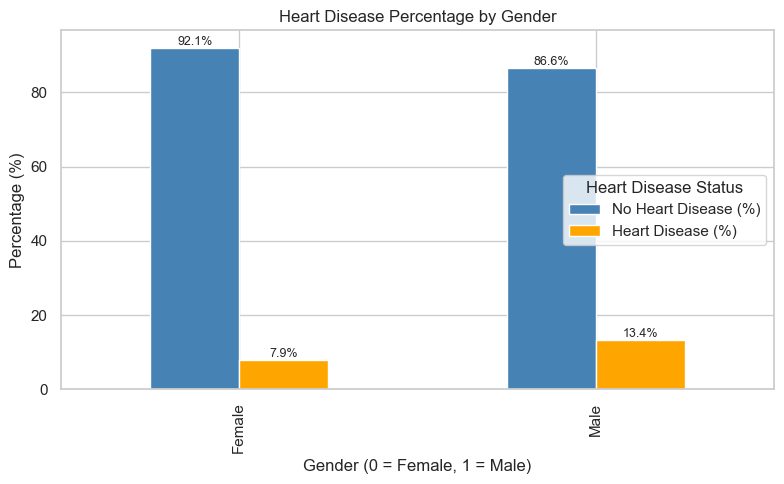

In [228]:
print(df["Sex"].value_counts())
print(df["Sex"].dtype)
sex_table = pd.crosstab(df["Sex"], df["HeartDiseaseorAttack"])
sex_table
sex_percent = sex_table.div(sex_table.sum(axis=1), axis=0) * 100
sex_percent.columns = ["No Heart Disease (%)", "Heart Disease (%)"]
sex_percent
ax = sex_percent.plot(
    kind="bar",
    figsize=(8,5),
    color=["steelblue", "orange"]
)

plt.title("Heart Disease Percentage by Gender")
plt.xlabel("Gender (0 = Female, 1 = Male)")
plt.ylabel("Percentage (%)")
plt.legend(title="Heart Disease Status")
plt.tight_layout()

for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="edge", fontsize=9)

plt.show()


- Males show a higher percentage of heart disease compared to females.  
This indicates that gender is an important demographic risk factor for cardiovascular disease.


### Heart Disease by Age Group


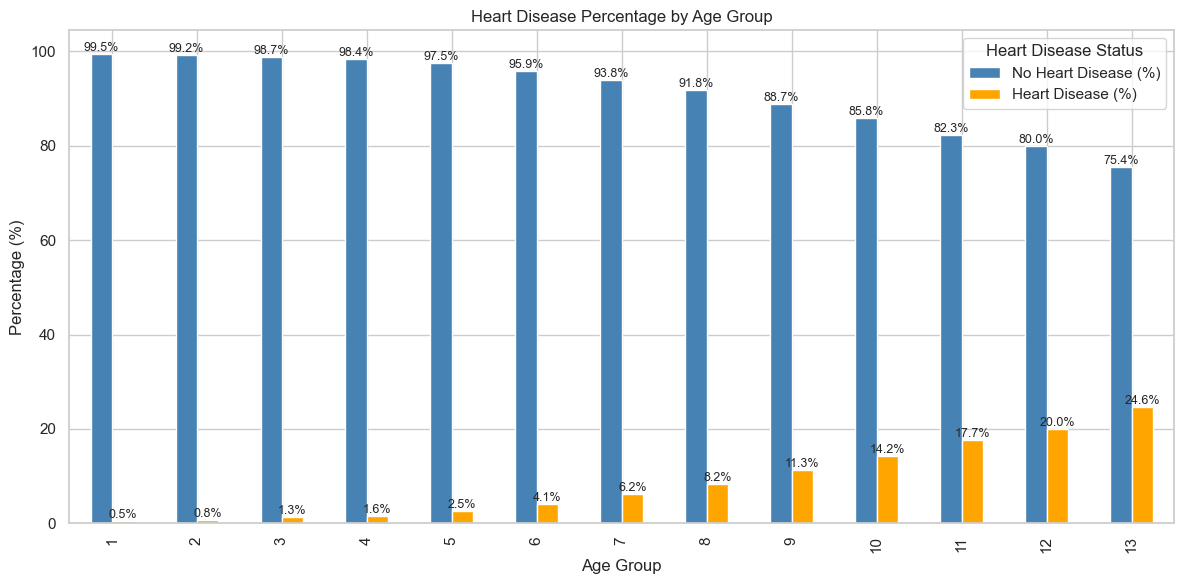

In [229]:
# Create cross-tabulation of Age vs Heart Disease
age_table = pd.crosstab(df["Age"], df["HeartDiseaseorAttack"])

# Display raw counts
age_table
# Convert counts to row-wise percentages
age_percent = age_table.div(age_table.sum(axis=1), axis=0) * 100

# Rename columns for clarity
age_percent.columns = ["No Heart Disease (%)", "Heart Disease (%)"]

# Display percentage table
age_percent

# Plot both Yes and No percentages
ax = age_percent.plot(
    kind="bar",
    figsize=(12,6),
    color=["steelblue", "orange"]
)

plt.title("Heart Disease Percentage by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Percentage (%)")
plt.legend(title="Heart Disease Status")
plt.tight_layout()

# Add percentage labels on each bar
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="edge", fontsize=9)

plt.show()



- The percentage of individuals with heart disease increases steadily with age, 
while the proportion without heart disease decreases.  
This visual clearly demonstrates age as a strong cardiovascular risk factor.


### Heart Disease by Education Level


Education
1      174
2     4040
3     9467
4    61158
5    66499
6    88443
Name: count, dtype: int64
int64


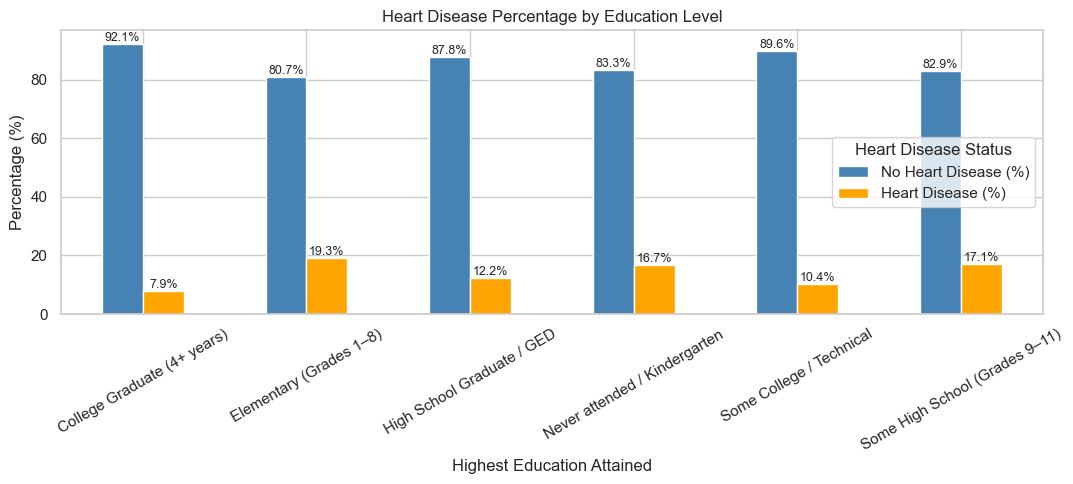

In [230]:
print(df["Education"].value_counts().sort_index())
print(df["Education"].dtype)
education_labels = {
    1: "Never attended / Kindergarten",
    2: "Elementary (Grades 1–8)",
    3: "Some High School (Grades 9–11)",
    4: "High School Graduate / GED",
    5: "Some College / Technical",
    6: "College Graduate (4+ years)"
}

df["EducationLevel"] = df["Education"].map(education_labels).astype("category")
edu_table = pd.crosstab(df["EducationLevel"], df["HeartDiseaseorAttack"])
edu_table
edu_percent = edu_table.div(edu_table.sum(axis=1), axis=0) * 100
edu_percent.columns = ["No Heart Disease (%)", "Heart Disease (%)"]
edu_percent
ax = edu_percent.plot(
    kind="bar",
    figsize=(11,5),
    color=["steelblue", "orange"]
)

plt.title("Heart Disease Percentage by Education Level")
plt.xlabel("Highest Education Attained")
plt.ylabel("Percentage (%)")
plt.legend(title="Heart Disease Status")
plt.xticks(rotation=30)
plt.tight_layout()

for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="edge", fontsize=9)

plt.show()


- Interpretation: Heart Disease by Education Level

Heart disease prevalence shows a clear inverse relationship with educational attainment.

Individuals with college education (4+ years) have the lowest heart disease prevalence (7.9%), suggesting better health awareness, access to care, and healthier lifestyles.

Those with some college or technical education also show relatively low prevalence (10.4%).

In contrast, people with elementary education (Grades 1–8) have the highest heart disease prevalence (19.3%).

Individuals with some high school (Grades 9–11) and those who never attended school / kindergarten also show elevated rates (17.1% and 16.7%, respectively).

High school graduates (GED) fall in the mid-range (12.2%).

This pattern suggests that lower educational attainment is associated with higher cardiovascular risk, likely due to factors such as reduced health literacy, limited access to preventive care, higher occupational stress, and poorer socioeconomic conditions.


### Heart Disease by Income Level

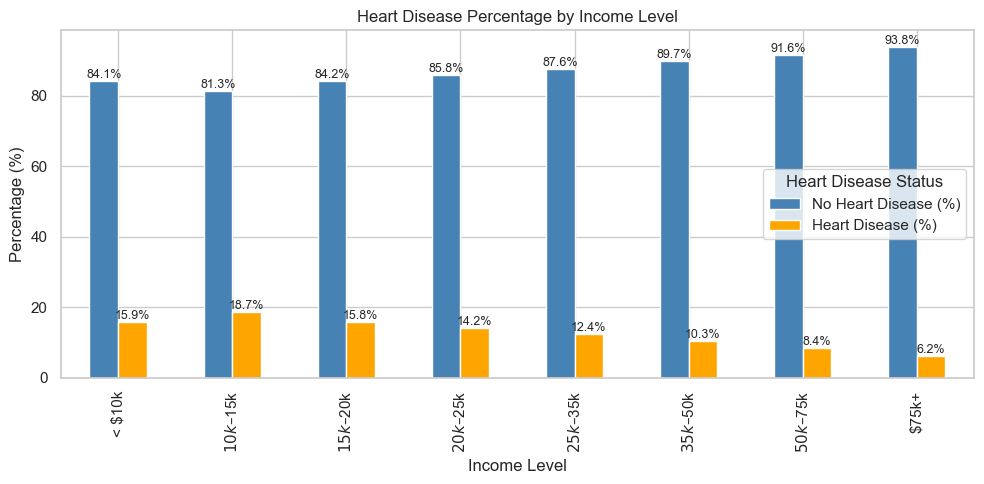

In [231]:
# Income mapping (from codebook)
income_labels = {
    1: "< $10k",
    2: "$10k–$15k",
    3: "$15k–$20k",
    4: "$20k–$25k",
    5: "$25k–$35k",
    6: "$35k–$50k",
    7: "$50k–$75k",
    8: "$75k+"
}

# Correct income order (lowest → highest)
income_order = [
    "< $10k",
    "$10k–$15k",
    "$15k–$20k",
    "$20k–$25k",
    "$25k–$35k",
    "$35k–$50k",
    "$50k–$75k",
    "$75k+"
]

df["IncomeLabel"] = df["Income"].map(income_labels).astype("category")

df["IncomeLabel"] = df["IncomeLabel"].cat.set_categories(
    income_order,
    ordered=True
)

# Crosstab (preserves order)
income_table = pd.crosstab(
    df["IncomeLabel"],
    df["HeartDiseaseorAttack"],
    dropna=False
)

income_percent = income_table.div(income_table.sum(axis=1), axis=0) * 100
income_percent.columns = ["No Heart Disease (%)", "Heart Disease (%)"]

# Plot
ax = income_percent.plot(
    kind="bar",
    figsize=(10,5),
    color=["steelblue", "orange"]
)

plt.title("Heart Disease Percentage by Income Level")
plt.xlabel("Income Level")
plt.ylabel("Percentage (%)")
plt.legend(title="Heart Disease Status")
plt.tight_layout()

for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="edge", fontsize=9)

plt.show()


- Interpretation

Heart disease prevalence decreases steadily as income increases.

Lowest income groups (< $15k) show ~16–19% heart disease prevalence

Middle-income groups ($25k–50k) show ~10–12%

Highest income group ($75k+) shows the lowest prevalence (~6.2%)

This indicates a strong inverse relationship between income and heart disease.

Higher income likely provides better access to healthcare, healthier food, preventive screenings, and healthier living conditions — all of which reduce cardiovascular risk.

Income acts as an important socioeconomic determinant of health in this dataset.

### Demographic Insights Summary

Heart disease prevalence varies significantly across key demographic and socioeconomic groups.

Males and older individuals show a higher cardiovascular risk, confirming age and gender as strong non-modifiable risk factors. Heart disease prevalence increases steadily across higher age groups, highlighting aging as one of the most influential drivers of cardiovascular disease.

Education level also plays an important role. Individuals with lower educational attainment exhibit higher heart disease prevalence, while college-educated individuals show lower risk. This likely reflects differences in health awareness, occupational exposure, and access to preventive care.

Income demonstrates a strong inverse relationship with heart disease. Lower-income groups experience substantially higher prevalence, whereas higher-income individuals show the lowest risk. This underscores the importance of socioeconomic status in shaping long-term health outcomes through access to healthcare, nutrition, and healthier living environments.

Overall, these findings emphasize that heart disease risk is shaped not only by biological factors such as age and sex, but also by broader social determinants of health, including education and income.
